In [1]:
import os
import glob
import sys
sys.path.append(os.path.abspath(os.getcwd()))
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from data_helper import get_data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
colors = cm.tab10(np.linspace(0, 1, 6))
legends = {'Nexu_IT': "Nexullance_IT",
           'ECMP_ASP': 'ECMP_ASP',
            'UGAL': 'UGAL',
            'Nexu_MP_APST4': 'Nexullance_MP_APST4 (~optimal)',
            'Nexu_MMR_Alltoall': 'MMR_all_shifts'}
colors = {'Nexu_IT': [0.89019608, 0.46666667, 0.76078431, 1.        ],
           'ECMP_ASP': [0.7372549 , 0.74117647, 0.13333333, 1.        ],
            'UGAL': [0.09019608, 0.74509804, 0.81176471, 1.        ],
            'Nexu_MP_APST4': [0.58039216, 0.40392157, 0.74117647, 1.        ],
            'Nexu_MMR_Alltoall': [0.12156863, 0.47058824, 0.70588235, 1.        ]}


In [3]:
parent_folder_path = "/users/ziyzhang/EFM_experiments/Merlin-alone/uniform"
results = {}
for folder_path in glob.glob(os.path.join(parent_folder_path, '*/')):
    config_name = folder_path.split('RRG_36_7_')[1][:-1]
    result = get_data(folder_path)
    results[config_name] = result

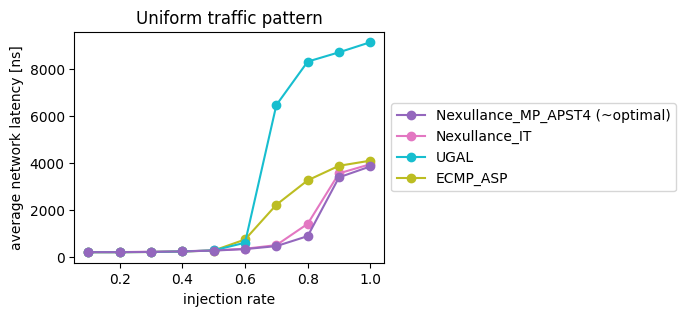

In [4]:
fig, ax = plt.subplots(figsize=(4, 3))
for _label, _data in results.items():
    ax.plot(_data["load"], _data["ave_nlat"], "o-", label=legends[_label], c = colors[_label])
ax.legend()
ax.set_xlabel("injection rate")
ax.set_ylabel("average network latency [ns]")
ax.set_title("Uniform traffic pattern")
handles, labels = fig.gca().get_legend_handles_labels()
order = [3,0,2,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))


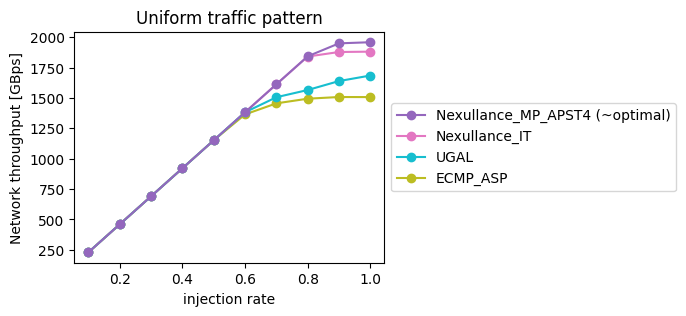

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
for _label, _data in results.items():
    ax.plot(_data["load"], _data["Phi"], "o-", label=legends[_label], c = colors[_label])
ax.legend()
ax.set_xlabel("injection rate")
ax.set_ylabel("Network throughput [GBps]")
# ax.set_ylabel("$\Phi$ [GBps]")
ax.set_title("Uniform traffic pattern")
handles, labels = fig.gca().get_legend_handles_labels()
order = [3,0,2,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
parent_folder_path = "/users/ziyzhang/EFM_experiments/Merlin-alone/shift_half"
results = {}
for folder_path in glob.glob(os.path.join(parent_folder_path, '*/')):
    config_name = folder_path.split('RRG_36_7_')[1][:-1]
    result = get_data(folder_path)
    results[config_name] = result

In [7]:
results.pop("Nexu_MMR_Alltoall")

,load,ave_nlat,Phi,L_access
0,0.1,253.576444,230.40000,1.600000
1,0.2,255.491982,460.80000,3.200000
2,0.3,272.729354,691.20000,4.800000
3,0.4,312.077871,921.60000,6.400000
4,0.5,413.860235,1152.00000,8.000000
5,0.6,1456.938599,1382.20800,9.598667
6,0.7,4938.687933,1417.15712,9.841369
7,0.8,5390.244975,1414.42304,9.822382
8,0.9,5790.283666,1418.01728,9.847342
9,1.0,6372.224820,1416.02304,9.833493


In [8]:
results

{'Nexu_IT':    load     ave_nlat         Phi  L_access
 0   0.1   268.580700   230.40000  1.600000
 1   0.2   273.481077   460.80000  3.200000
 2   0.3   289.118568   691.20000  4.800000
 3   0.4   332.708541   921.60000  6.400000
 4   0.5   533.260746  1152.00000  8.000000
 5   0.6  3626.797504  1261.21216  8.758418
 6   0.7  4352.057683  1263.62368  8.775164
 7   0.8  5051.851803  1266.05824  8.792071
 8   0.9  5176.685565  1266.25792  8.793458
 9   1.0  5637.410836  1265.15712  8.785813,
 'ECMP_ASP':    load     ave_nlat        Phi  L_access
 0   0.1   232.504233  230.40000  1.600000
 1   0.2   232.488332  460.80000  3.200000
 2   0.3  3350.417675  608.72704  4.227271
 3   0.4  4944.773193  652.98432  4.534613
 4   0.5  6436.211418  678.91712  4.714702
 5   0.6  7266.288714  686.18496  4.765173
 6   0.7  7710.392095  686.81472  4.769547
 7   0.8  8715.024143  688.51200  4.781333
 8   0.9  8754.507038  688.59136  4.781884
 9   1.0  9041.885374  687.20128  4.772231,
 'UGAL':    load  

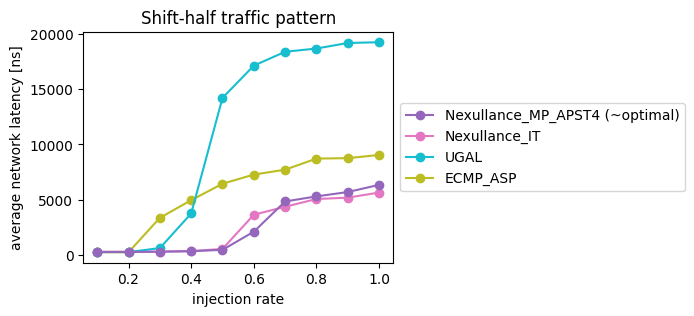

In [10]:
fig, ax = plt.subplots(figsize=(4, 3))
for _label, _data in results.items():
    if _label == "Nexu_MMR_Alltoall":
        ax.plot(_data["load"], _data["ave_nlat"], "x-", label=legends[_label], c = colors[_label])
    else:
        ax.plot(_data["load"], _data["ave_nlat"], "o-", label=legends[_label], c = colors[_label])
ax.legend()
ax.set_xlabel("injection rate")
ax.set_ylabel("average network latency [ns]")
ax.set_title("Shift-half traffic pattern")
handles, labels = fig.gca().get_legend_handles_labels()
order = [3,0,2,1]
# order = [3,0,2,1,4]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))

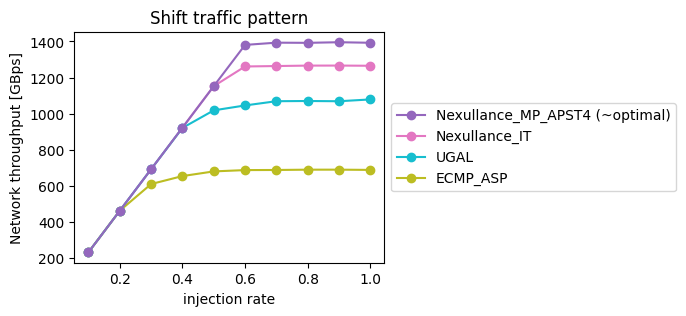

In [11]:
fig, ax = plt.subplots(figsize=(4, 3))
for _label, _data in results.items():
    if _label == "Nexu_MMR_Alltoall":
        ax.plot(_data["load"], _data["Phi"], "x-", label=legends[_label], c = colors[_label])
    else:
        ax.plot(_data["load"], _data["Phi"], "o-", label=legends[_label], c = colors[_label])
ax.legend()
ax.set_xlabel("injection rate")
ax.set_ylabel("Network throughput [GBps]")
# ax.set_ylabel("$\Phi$ [GBps]")
ax.set_title("Shift traffic pattern")
handles, labels = fig.gca().get_legend_handles_labels()
order = [3,0,2,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))